In [140]:
import numpy as np
import pickle
import gzip
import glob
import json
import csv
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import imageio
import cv2
    
sns.set()

%matplotlib inline

Specify the experiment directory: pass this in as a command line argument.

In [2]:
# Specify the experiment directory
experiment_dir = '/home/justinvyu/ray_results/gym/DClaw/TurnFreeValve3ResetFreeSwapGoal-v0/2019-08-16T02-38-24-state_estimation_scaled_goal_condition'

What needs to be saved?
1. Plots of whatever the user passes in ("observation_keys")
    - TODO: Split by whatever the experiment is being tuned over (like in viskit)
2. (# of goals, resets/reset-free, domain/task, VICE/gtr, etc.)
3. Gifs of the run
4. Important parameters

In [4]:
def log_experiment(experiment_dir, observation_keys):
    # Search for the seed directories
    for seed in glob.iglob(os.path.join(experiment_dir, '*')):
        if not os.path.isdir(seed):
            continue
        

SyntaxError: invalid syntax (<ipython-input-4-1908c3b39ec3>, line 2)

In [32]:
test = '/home/justinvyu/ray_results/gym/DClaw/TurnFreeValve3ResetFreeSwapGoal-v0/2019-08-16T02-38-24-state_estimation_scaled_goal_condition/id=9867fc30-seed=2007_2019-08-16_02-38-25c0jt87k7/progress.csv'
with open(test, newline='') as f:
    df = pd.read_csv(f)

In [141]:
df.columns

Index(['Q_values-mean', 'Q_values-std', 'Q_losses-mean', 'Q_losses-std',
       'policy_losses-mean', 'policy_losses-std', 'alpha', 'global_step',
       'policy/shifts-mean', 'policy/shifts-std',
       ...
       'timestamp', 'time_this_iter_s', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'config', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore'],
      dtype='object', length=424)

In [37]:
observation_keys = [
    'object_to_target_circle_distance-last-mean',
    'object_to_target_position_distance-last-mean',
]

In [145]:
# evaluation_obs_path = 'evaluation/env_infos/obs/'
# training_obs_path = 'training/env_infos/obs/'

def contains_str_from_list(str_to_check, str_list):
    return any(s in str_to_check for s in str_list)

all_obs_keys_to_record = [
    col_name for col_name in df.columns
    if contains_str_from_list(col_name, observation_keys)]

# all_obs_keys_to_record = np.concatenate([
#     [path + observation_key for observation_key in observation_keys]
#     for path in (evaluation_obs_path, training_obs_path)
# ])
all_obs_keys_to_record

['evaluation/env_infos/obs/object_to_target_circle_distance-last-mean', 'evaluation/env_infos/obs/object_to_target_position_distance-last-mean', 'training/env_infos/obs/object_to_target_circle_distance-last-mean', 'training/env_infos/obs/object_to_target_position_distance-last-mean']

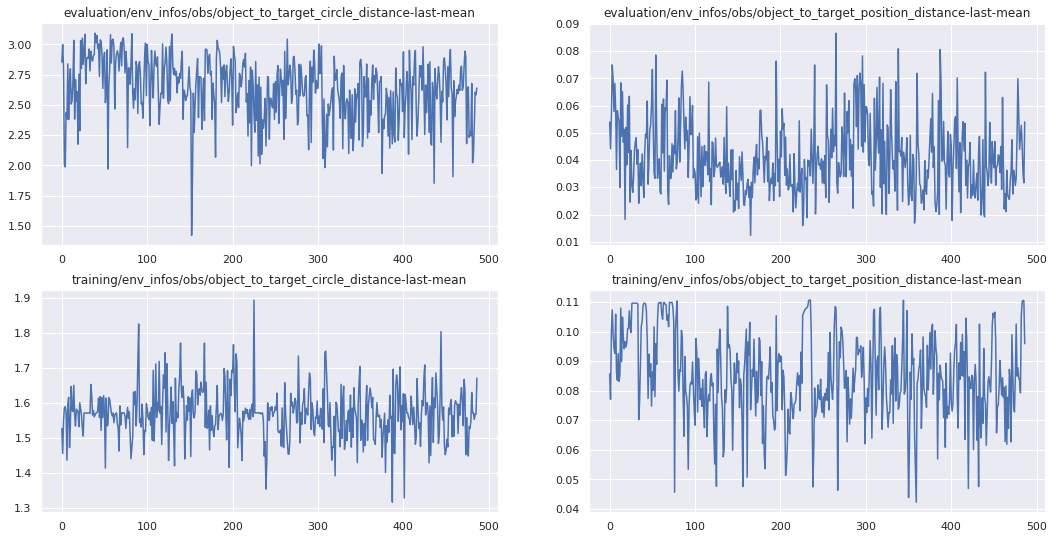

In [173]:
record_data = df[all_obs_keys_to_record]
num_keys = len(all_obs_keys_to_record)

if num_keys % 2 != 0:
    num_keys += 1
num_rows = num_keys // 2
num_cols = 2

curr_row, curr_col = 0, 0
fig, ax = plt.subplots(2, 2, figsize=(18, 9))
for i, col in enumerate(record_data):
    num_data_points = len(record_data[col])
    data = record_data[col]
#     ax[i].subplot(num_rows, num_cols, i + 1)
    row_index, col_index = i // num_rows, i % num_cols
    ax[row_index, col_index].set_title(col)
    ax[row_index, col_index].plot(data)
    
# plt.show()

In [216]:
def generate_plots(seed_dir, save_dir, observation_keys, fig=None, axes=None):
    data_fn = os.path.join(seed_dir, 'progress.csv')
    with open(data_fn, newline='') as f:
        df = pd.read_csv(f)
        
    def contains_str_from_list(str_to_check, str_list):
        return any(s in str_to_check for s in str_list)

    all_obs_keys_to_record = [
        col_name for col_name in df.columns
        if contains_str_from_list(col_name, observation_keys)
    ]
    
    record_data = df[all_obs_keys_to_record]
    num_keys = len(all_obs_keys_to_record)

    # Set up the figure
    if num_keys % 2 != 0:
        num_keys += 1
    num_rows = num_keys // 2
    num_cols = 2
    
    if fig is None and axes is None:
        fig, axes = plt.subplots(num_cols, num_rows, figsize=(18, 9))

    for i, col in enumerate(record_data):
        num_data_points = len(record_data[col])
        data = record_data[col]
        row_index, col_index = i // num_rows, i % num_cols
        axes[row_index, col_index].set_title(col)
        axes[row_index, col_index].plot(data, alpha=0.9)
    
    return fig, axes

In [190]:
video_save_frequency = 100
video_path = '/home/justinvyu/ray_results/gym/DClaw/TurnFreeValve3ResetFreeSwapGoal-v0/2019-08-16T02-38-24-state_estimation_scaled_goal_condition/id=9867fc30-seed=2007_2019-08-16_02-38-25c0jt87k7/videos'
for video_path in glob.iglob(os.path.join(video_path, '*00_0.mp4')):
    print(video_path)

/home/justinvyu/ray_results/gym/DClaw/TurnFreeValve3ResetFreeSwapGoal-v0/2019-08-16T02-38-24-state_estimation_scaled_goal_condition/id=9867fc30-seed=2007_2019-08-16_02-38-25c0jt87k7/videos/training_path_300_0.mp4
/home/justinvyu/ray_results/gym/DClaw/TurnFreeValve3ResetFreeSwapGoal-v0/2019-08-16T02-38-24-state_estimation_scaled_goal_condition/id=9867fc30-seed=2007_2019-08-16_02-38-25c0jt87k7/videos/training_path_500_0.mp4
/home/justinvyu/ray_results/gym/DClaw/TurnFreeValve3ResetFreeSwapGoal-v0/2019-08-16T02-38-24-state_estimation_scaled_goal_condition/id=9867fc30-seed=2007_2019-08-16_02-38-25c0jt87k7/videos/training_path_100_0.mp4
/home/justinvyu/ray_results/gym/DClaw/TurnFreeValve3ResetFreeSwapGoal-v0/2019-08-16T02-38-24-state_estimation_scaled_goal_condition/id=9867fc30-seed=2007_2019-08-16_02-38-25c0jt87k7/videos/evaluation_path_300_0.mp4
/home/justinvyu/ray_results/gym/DClaw/TurnFreeValve3ResetFreeSwapGoal-v0/2019-08-16T02-38-24-state_estimation_scaled_goal_condition/id=9867fc30-se

In [191]:
test_video = '/home/justinvyu/ray_results/gym/DClaw/TurnFreeValve3ResetFreeSwapGoal-v0/2019-08-16T15-46-37-two_policies_debug/id=b529c39e-seed=2542_2019-08-16_15-46-38m9pcum43/videos/training_path_0_0.mp4'

def extract_video_frames(video_path, img_size):
    vidcap = cv2.VideoCapture(video_path)
    success, image = vidcap.read()
    images = []
    while success:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, img_size)
        images.append(image)
        success, image = vidcap.read()
    return images

def convert_images_to_gif(images, save_path):
    imageio.mimsave(save_path, images)

def video_to_gif(video_path, output_path, img_size=(100, 100)):
    images = extract_video_frames(test_video, img_size)
    convert_images_to_gif(images, output_path)

In [225]:
def save_gifs(seed_dir, save_dir, save_frequency=100):
    video_path = os.path.join(seed_dir, 'videos')
    # TODO: Find the videos to save w.r.t save_frequency.
    for path in glob.iglob(os.path.join(video_path, '*00_0.mp4')):
        seed_name = seed_dir.split('seed=')[-1].split('_')[0]
        output_fn = 'seed=' + seed_name + '_' + path.split('/')[-1].replace('mp4', 'gif')
        output_path = os.path.join(save_dir, output_fn)
        video_to_gif(path, output_path)

In [208]:
def log_experiment(experiment_dir, observation_keys):
    if not os.path.exists(os.path.join(experiment_dir, 'log')):
        os.mkdir(os.path.join(experiment_dir, 'log'))
    
    save_dir = os.path.join(experiment_dir, 'log')
    # Search for the seed directories
    fig, axes = None, None
    for seed_dir in glob.iglob(os.path.join(experiment_dir, '*')):
        if not os.path.isdir(seed_dir) or seed_dir == save_dir:
            continue
        fig, axes = generate_plots(seed_dir, save_dir, observation_keys, fig=fig, axes=axes)
        save_gifs(seed_dir, save_dir)

    output_fn = os.path.join(save_dir, 'plots.png')
    plt.savefig(output_fn)
    plt.show()
        

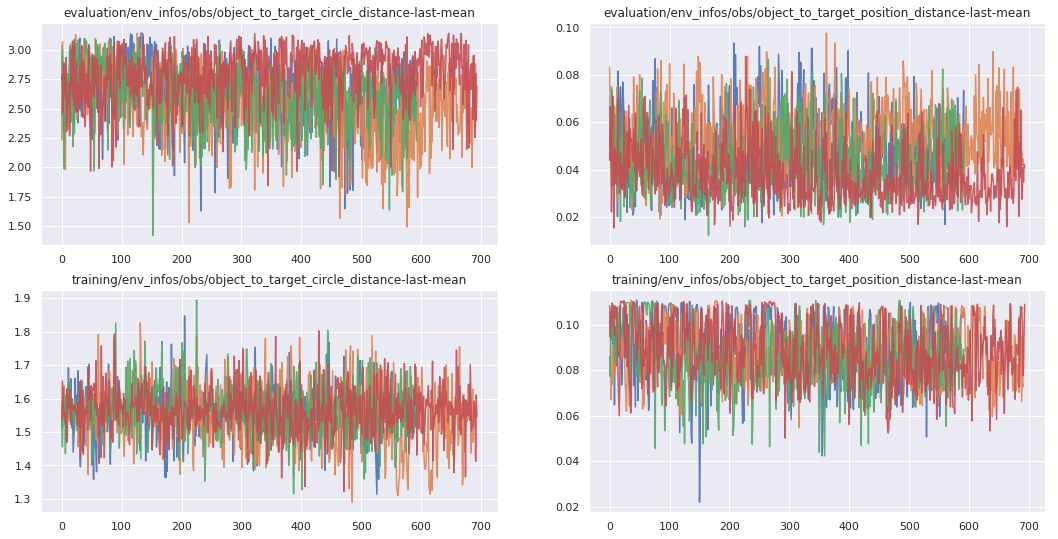

In [227]:
log_experiment('/home/justinvyu/ray_results/gym/DClaw/TurnFreeValve3ResetFreeSwapGoal-v0/2019-08-16T02-38-24-state_estimation_scaled_goal_condition/',
               observation_keys)